import data set



In [1]:
import pandas as pd

In [2]:
Energy_data = pd.read_csv("household_power_consumption.txt",sep=";")


In [3]:
Energy_data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
Energy_data.shape

(327915, 9)

combine date and time column

In [5]:
Energy_data['Date'] = pd.to_datetime(Energy_data['Date']+" "+Energy_data['Time'])

/tmp/ipython-input-1399428133.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Energy_data['Date'] = pd.to_datetime(Energy_data['Date']+" "+Energy_data['Time'])


In [6]:
Energy_data['Global_reactive_power'] = pd.to_numeric(Energy_data['Global_reactive_power'],errors='coerce')

In [7]:
Energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327915 entries, 0 to 327914
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   327915 non-null  datetime64[ns]
 1   Time                   327915 non-null  object        
 2   Global_active_power    327915 non-null  object        
 3   Global_reactive_power  323988 non-null  float64       
 4   Voltage                327915 non-null  object        
 5   Global_intensity       327915 non-null  object        
 6   Sub_metering_1         327915 non-null  object        
 7   Sub_metering_2         327915 non-null  object        
 8   Sub_metering_3         323987 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 22.5+ MB


In [8]:
Energy_data_tsa = Energy_data[['Date','Global_reactive_power']]

In [9]:
Energy_data['Date'].min(),Energy_data['Date'].max()

(Timestamp('2006-12-16 17:24:00'), Timestamp('2007-08-01 10:38:00'))

In [13]:
Energy_data_hourly = Energy_data_tsa.resample('D',on='Date').mean().reset_index()

In [14]:
Energy_data_hourly.head()

,Date,Global_reactive_power
0,2006-12-16,0.088187
1,2006-12-17,0.156949
2,2006-12-18,0.112356
3,2006-12-19,0.104821
4,2006-12-20,0.111804


In [15]:
Energy_data_hourly.shape

(229, 2)

checking for Null Values

In [16]:
Total = Energy_data_hourly.isnull().sum().sort_values(ascending=False)
Percent = (Energy_data_hourly.isnull().sum()*100/Energy_data_hourly.isnull().count()).sort_values(ascending=False)

In [17]:
missing_data = pd.concat([Total,Percent],axis=1,keys=['Total','Percent of missing value'])
missing_data

,Total,Percent of missing value
Global_reactive_power,1,0.436681
Date,0,0.000000


In [18]:
Energy_data_hourly=Energy_data_hourly.dropna()

In [19]:
Total = Energy_data_hourly.isnull().sum().sort_values(ascending=False)
Percent = (Energy_data_hourly.isnull().sum()*100/Energy_data_hourly.isnull().count()).sort_values(ascending=False)

In [20]:
missing_data = pd.concat([Total,Percent],axis=1,keys=['Total','Percent of missing value'])
missing_data

,Total,Percent of missing value
Date,0,0.0
Global_reactive_power,0,0.0


In [21]:
# Energy_data_hourly.set_index('Date')
# Energy_data_hourly.reset_index()
# Energy_data_hourly.drop(columns=['index'])
Energy_data_hourly.head()

,Date,Global_reactive_power
0,2006-12-16,0.088187
1,2006-12-17,0.156949
2,2006-12-18,0.112356
3,2006-12-19,0.104821
4,2006-12-20,0.111804


In [22]:
# Check whether the data evenly spaced
print(pd.infer_freq(Energy_data_hourly['Date']))

None


It means data is irregular

Make date fixed frequency

In [38]:
Energy_preprocess=Energy_data_hourly.copy()

In [39]:
Energy_preprocess.reset_index()

,index,Date,Global_reactive_power
0,0,2006-12-16,0.088187
1,1,2006-12-17,0.156949
2,2,2006-12-18,0.112356
3,3,2006-12-19,0.104821
4,4,2006-12-20,0.111804
...,...,...,...
223,224,2007-07-28,0.124118
224,225,2007-07-29,0.082344
225,226,2007-07-30,0.089925
226,227,2007-07-31,0.101240


In [40]:
Energy_preprocess.head()

,Date,Global_reactive_power
0,2006-12-16,0.088187
1,2006-12-17,0.156949
2,2006-12-18,0.112356
3,2006-12-19,0.104821
4,2006-12-20,0.111804


In [41]:
Energy_data_hourly_full = pd.date_range(start=Energy_preprocess['Date'].min(),
                                        end=Energy_preprocess['Date'].max(),
                                        freq='D')
Energy_preprocess = Energy_preprocess.set_index("Date").reindex(Energy_data_hourly_full)
Energy_preprocess.index.name = 'Date'





In [42]:
Energy_preprocess.head()

,Global_reactive_power
Date,
2006-12-16,0.088187
2006-12-17,0.156949
2006-12-18,0.112356
2006-12-19,0.104821
2006-12-20,0.111804


In [43]:
# checking for null values
Energy_preprocess.isna().sum().sum()

np.int64(1)

In [44]:
# fill null values with forward fill
Energy_preprocess=Energy_preprocess.ffill()

In [45]:
Energy_preprocess.isna().sum()

,0
Global_reactive_power,0


In [46]:
# check frequency again
print(pd.infer_freq(Energy_preprocess.index))

D


Lets consider 3 year data


In [47]:
Data = Energy_preprocess['2007':]

In [48]:
Data.head()

,Global_reactive_power
Date,
2007-01-01,0.102893
2007-01-02,0.132182
2007-01-03,0.136617
2007-01-04,0.140487
2007-01-05,0.120246


In [49]:
Data.shape

(213, 1)

Exploratory Data Analysis

In [50]:
# importing Data Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns

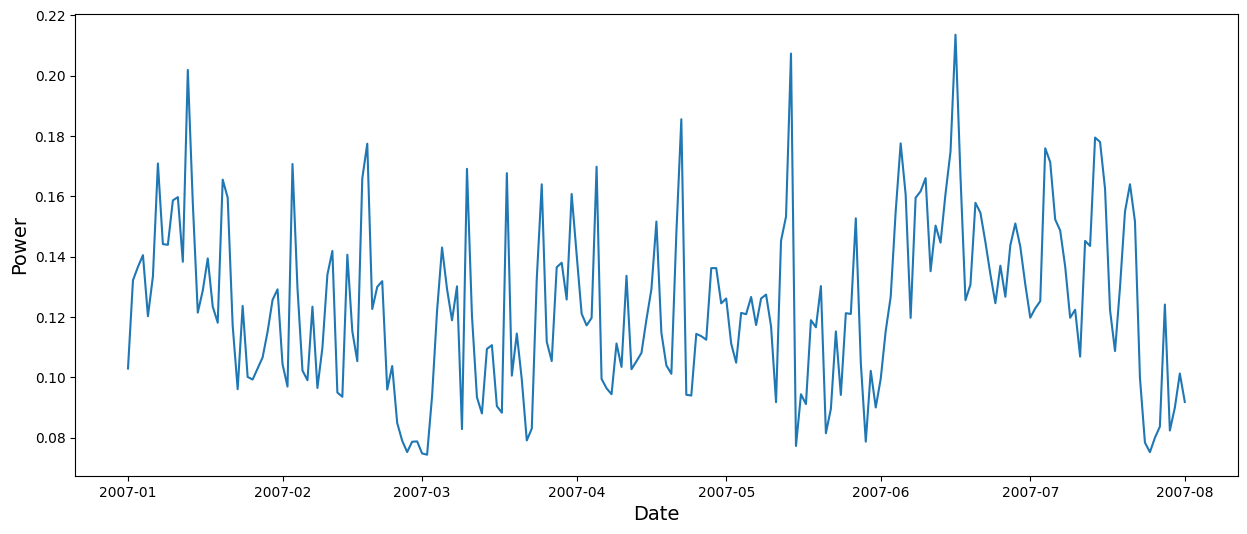

In [51]:
# Visualising the Surface Temperature Data

plt.figure(figsize=(15,6))
plt.plot(Data.index,
         Data['Global_reactive_power'])
plt.xlabel('Date',fontsize=14)
plt.ylabel("Power",fontsize=14)
plt.show()

In [52]:
Data.head()

,Global_reactive_power
Date,
2007-01-01,0.102893
2007-01-02,0.132182
2007-01-03,0.136617
2007-01-04,0.140487
2007-01-05,0.120246


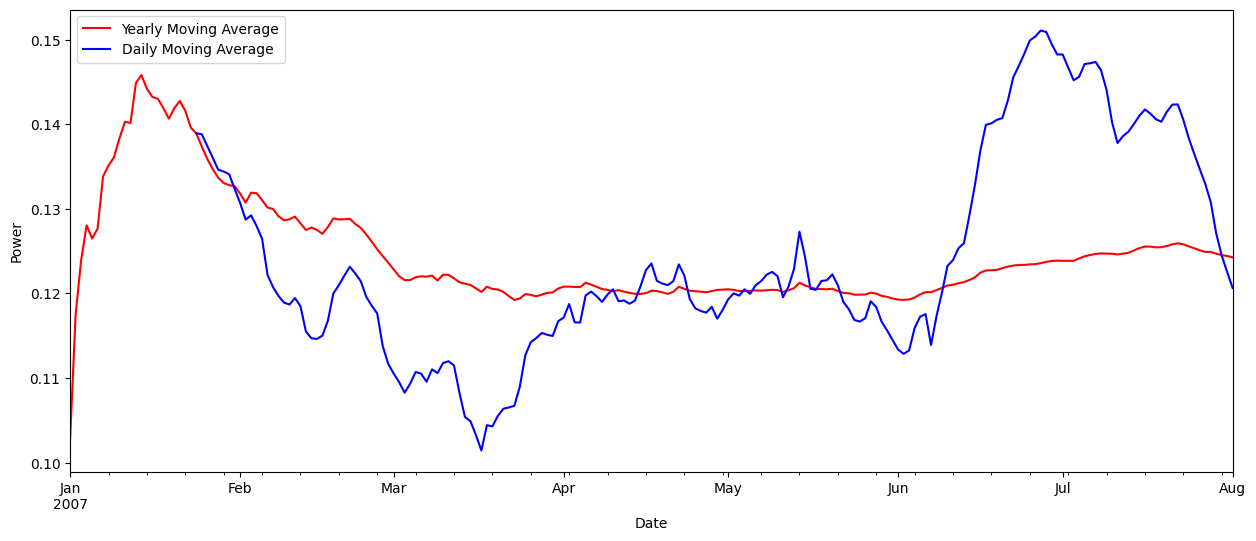

In [53]:
yearly = Data['Global_reactive_power'].rolling(window=8760,min_periods=1).mean()
Daily =Data['Global_reactive_power'].rolling(window=24).mean()
MAax = yearly['2007':].plot(figsize=(15,6),color='red',label = 'Yearly Moving Average')
Daily['2007':].plot(ax=MAax,color='blue',label = 'Daily Moving Average')
plt.xlabel("Date")
plt.ylabel("Power")
plt.legend()
plt.show()

Seasonal Decomposition using Moving Average

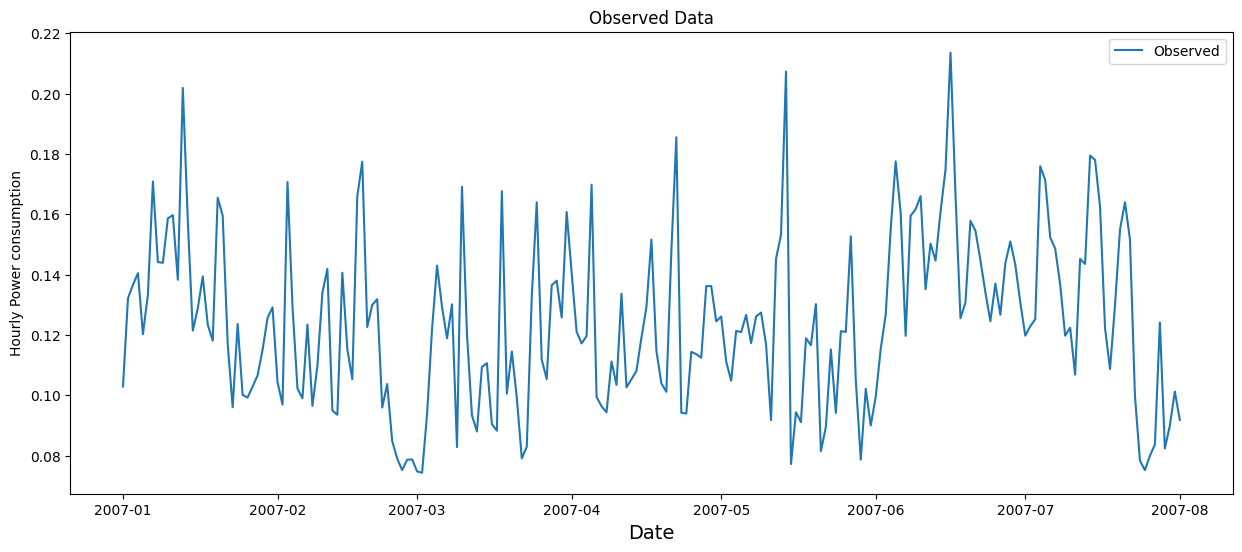

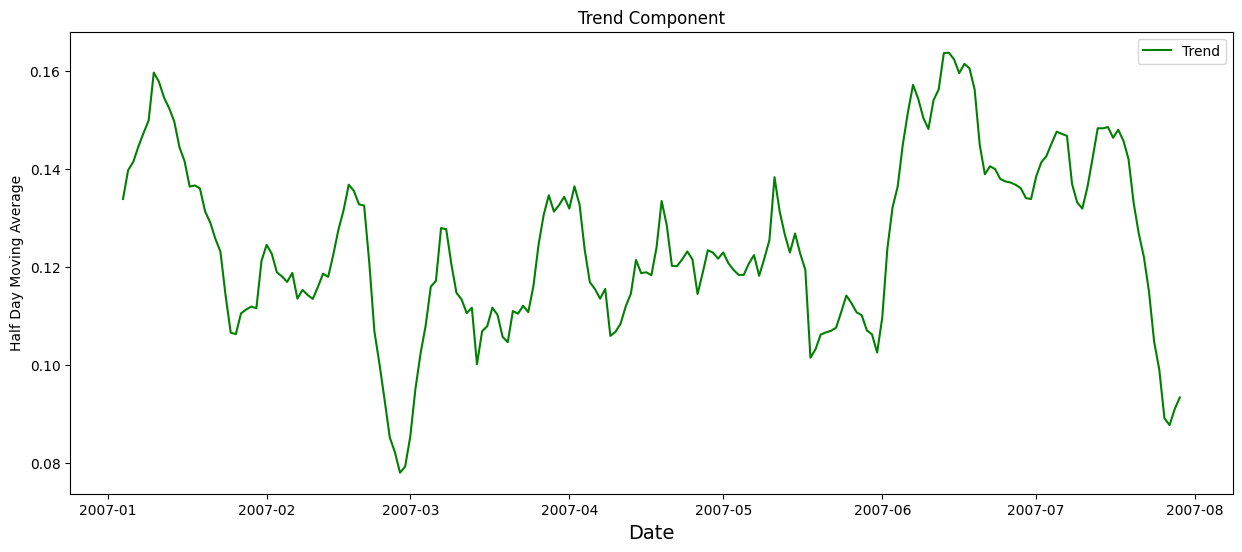

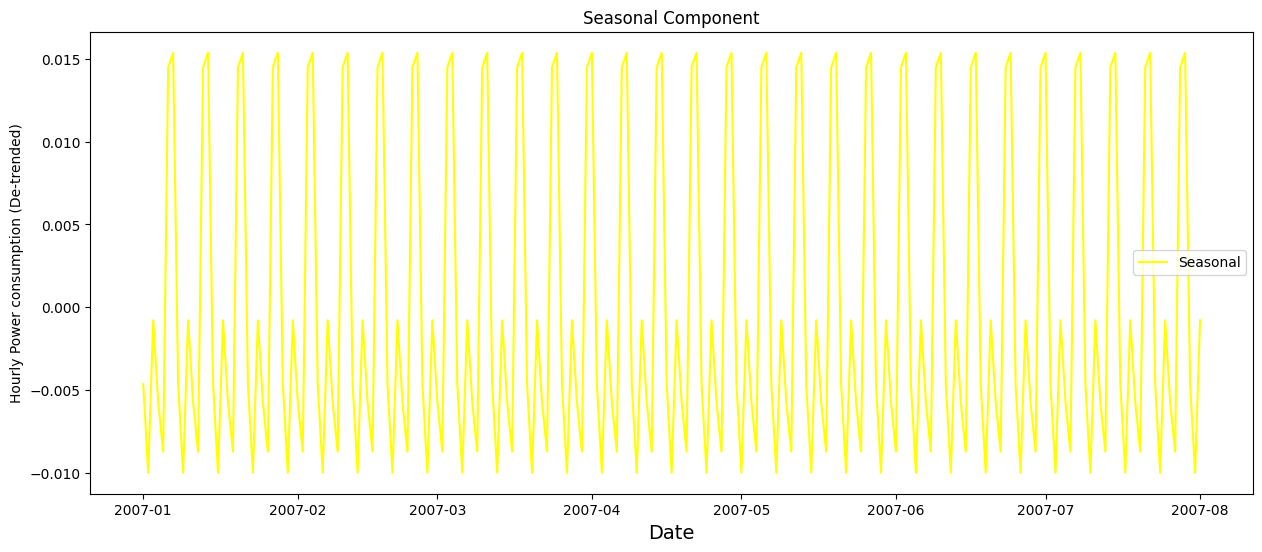

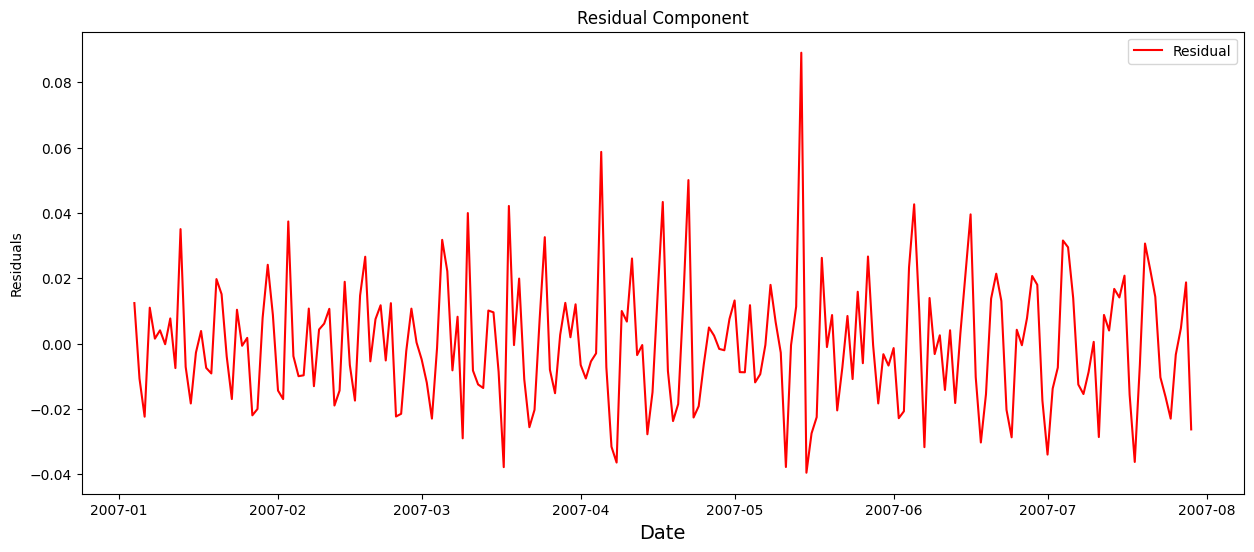

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomosiing the time series
decomposition = seasonal_decompose(Data)

# plotting the observed values
observed = decomposition.observed
plt.figure(figsize=(15,6))
plt.plot(observed,label='Observed')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Hourly Power consumption')
plt.legend(loc='best')
plt.title("Observed Data")
plt.show()

# plotting the trend component
trend = decomposition.trend
plt.figure(figsize=(15,6))
plt.plot(trend,label='Trend',color='green')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Half Day Moving Average')
plt.legend(loc='best')
plt.title("Trend Component")
plt.show()

# plotting the seasonal component
seasonal = decomposition.seasonal
plt.figure(figsize=(15,6))
plt.plot(seasonal,label='Seasonal',color='yellow')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Hourly Power consumption (De-trended)')
plt.legend(loc='best')
plt.title("Seasonal Component")
plt.show()

# plotting the residual component
residual = decomposition.resid
plt.figure(figsize=(15,6))
plt.plot(residual,label='Residual',color='red')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Residuals')
plt.legend(loc='best')
plt.title("Residual Component")
plt.show()

Checking for Stationarity of data

In [55]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
  print('Result of Dickey-Fuller Test:')
  dftest = adfuller(timeseries,autolag = 'AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','No. of Lags Used','Number of Observations Used'])


  for key,value in dftest[4].items():
    dfoutput[f'Critical Value {key}'] = value
  print(dfoutput)

adf_test(Data)


Result of Dickey-Fuller Test:
Test Statistic                  -3.351115
p-value                          0.012743
No. of Lags Used                 5.000000
Number of Observations Used    207.000000
Critical Value 1%               -3.462342
Critical Value 5%               -2.875606
Critical Value 10%              -2.574267
dtype: float64


The p-value is lesser than the level of significance (0.05) and hence it is strong evidence against the null hypothesis and therefore we reject the null hypothesis. This indicates that our time series data is stationary.

KPSS Test

In [56]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
  print('Result of KPSS Test')
  kpsstest = kpss(timeseries,regression='c',nlags='legacy')
  kpss_output = pd.Series(kpsstest[0:3],index=['Test Statistics','p-value','No of lags Used'])

  for key,value in kpsstest[3].items():
    kpss_output[f'Critcal Value {key}'] = value
  print(kpss_output)

kpss_test(Data)


Result of KPSS Test
Test Statistics        0.189694
p-value                0.100000
No of lags Used       15.000000
Critcal Value 10%      0.347000
Critcal Value 5%       0.463000
Critcal Value 2.5%     0.574000
Critcal Value 1%       0.739000
dtype: float64


/tmp/ipython-input-1786730755.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries,regression='c',nlags='legacy')


The KPSS test returned a p-value of 0.08, which is greater than the 0.05 significance level. Hence, we fail to reject the null hypothesis, indicating that the time series can be considered stationary.

Pre processing

In [57]:
y = Data

In [58]:
# creating Train Test Split
train = y[:int(len(y)*0.9)]
test = y[int(len(y)*0.9):]

ARIMA - Autoregressive Integrated Moving Average

In [59]:
# to find best p.q,d

import itertools
import statsmodels.api as sm

In [60]:
p = d = q = range(0,3)
pdq = list(itertools.product(p,d,q))

best_aic = float("inf")
best_order = None

for order in pdq:
  try:
    model = sm.tsa.ARIMA(train,order=order).fit()
    if model.aic < best_aic:
      best_aic = model.aic
      best_order = order
  except:
    continue
print("Best ARIMA order :", best_order,"with AIC ",best_aic)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWar

Best ARIMA order : (1, 0, 2) with AIC  -871.3199318223196


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [65]:
# build ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model_arima = sm.tsa.ARIMA(train,
                    order=(2,1,2))
model_fit = model_arima.fit()
print(model_fit.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Global_reactive_power   No. Observations:                  191
Model:                    ARIMA(2, 1, 2)   Log Likelihood                 434.947
Date:                   Sun, 07 Sep 2025   AIC                           -859.894
Time:                           06:49:07   BIC                           -843.659
Sample:                       01-01-2007   HQIC                          -853.317
                            - 07-10-2007                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4313      3.087     -0.140      0.889      -6.481       5.618
ar.L2          0.2920      1.086      0.269      0.788      -1.836       2.420
ma.L1         -0.1467      3

ARIMA Forecasting

<Figure size 800x400 with 0 Axes>

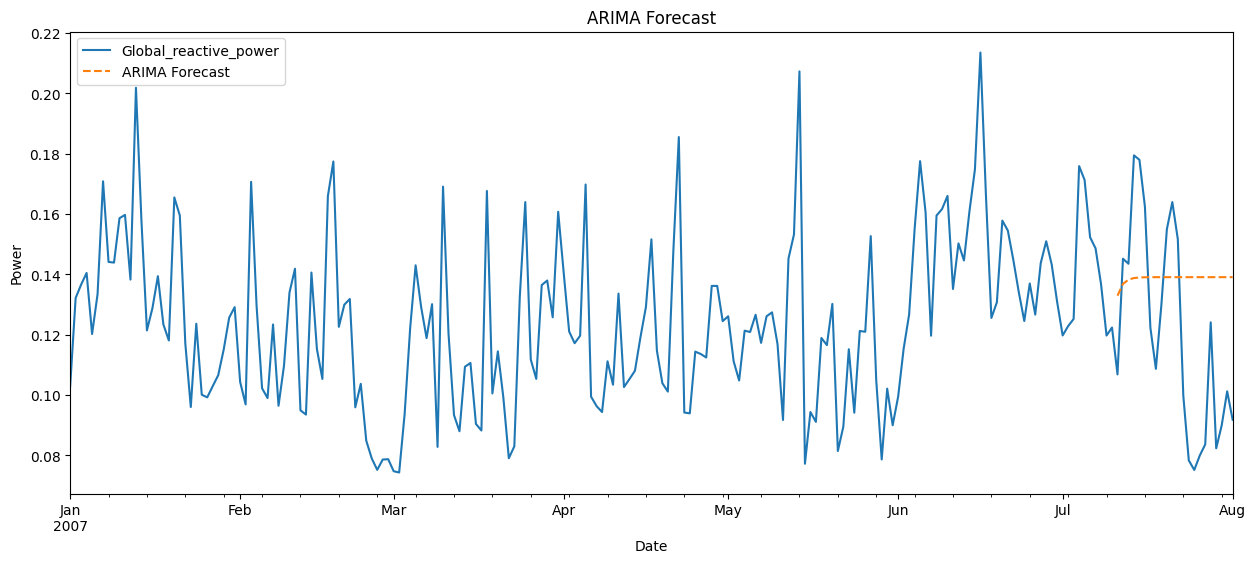

In [66]:
# Getting the ARIMAX forecast with number of steps as 36 since to amke one day predictions

pred = model_fit.forecast(steps=len(test))

pred = pd.Series(pred,index=test.index)
# plotting the observerd and forecasted values

plt.figure(figsize=(8,4))
ax1 = y['2007':].plot(label = 'Observed')

pred.plot(ax=ax1,label = 'ARIMA Forecast' ,figsize=(15,6),linestyle='dashed')
plt.title('ARIMA Forecast')

plt.xlabel('Date')
plt.ylabel('Power')
plt.legend(loc='upper left')
plt.show()


In [67]:
# Evaluation
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(test,pred)
mae = mean_absolute_error(test,pred)
rmse = np.sqrt(mse)

In [68]:
print("mse :",mse)
print("mae :",mae)
print("rmse :",rmse)

mse : 0.0014659237653617408
mae : 0.03350706146452882
rmse : 0.03828738389289272


SARIMA

In [69]:
# best parameters
from statsmodels.tsa.statespace.sarimax import SARIMAX
s=24
p=d=q =range(0,2)
P=D=Q=range(0,2)

best_aic = float('inf')
best_order = None
best_seasonal_order = None

for param in itertools.product(p,d,q):
  for seasonal_param in itertools.product(P,D,Q):
    try:
      model = SARIMAX(train,
                      order = param,
                      seasonal_order=(*seasonal_param,s),
                      enforce_invertibility=False,
                      enforce_stationarity=False
                      )
      result = model.fit(disp=False)
      if result.aic < best_aic:
        best_aic = result.aic
        best_order = param
        best_seasonal_order = seasonal_param
    except:
      continue

print("Best SARIMA order ",best_order)
print("Best SARIMA  seasonal order ",best_seasonal_order)
print("Best AIC ",best_aic)


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Best SARIMA order  (1, 1, 1)
Best SARIMA  seasonal order  (0, 0, 0)
Best AIC  -854.3484434383377


In [70]:
model_sarima = SARIMAX(train,
                        order=(1,1,1),
                        seasonal_order=(0,0,0,7),
                       enforce_stationarity=False,
                       enforce_invertibility=False
)
fitted_model = model_sarima.fit(maxiter=200,method='nm')
print(fitted_model.summary())


Optimization terminated successfully.
         Current function value: -2.252221
         Iterations: 49
         Function evaluations: 89
                                 SARIMAX Results                                 
Dep. Variable:     Global_reactive_power   No. Observations:                  191
Model:                  SARIMAX(1, 1, 1)   Log Likelihood                 430.174
Date:                   Sun, 07 Sep 2025   AIC                           -854.348
Time:                           07:11:20   BIC                           -844.639
Sample:                       01-01-2007   HQIC                          -850.415
                            - 07-10-2007                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3390      0.075      4.538    

Forecast SARIMA

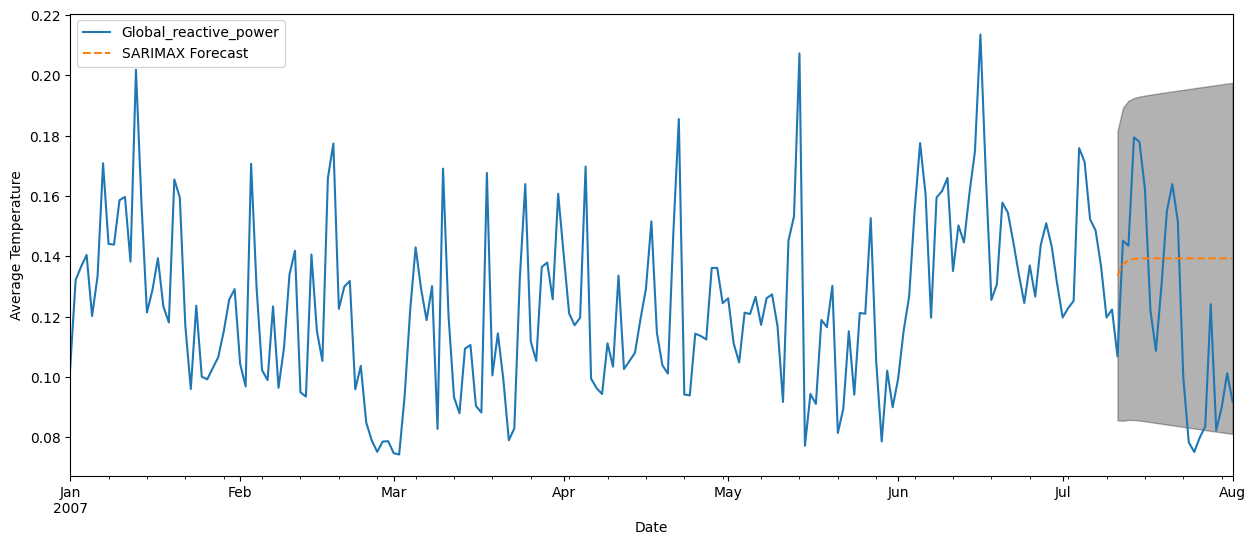

In [71]:
# Getting the   SARIMAX forecast with number of steps as length of test data
pred = fitted_model.get_forecast(steps=len(test))
# plotting observed vs forecast
ax1 =y['2007':].plot(label="observed")
pred.predicted_mean.plot(ax=ax1,label='SARIMAX Forecast ',figsize=(15,6),linestyle='dashed')

# finding the confidence interval of the forecast
pred_ci = pred.conf_int()
ax1.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=0.3)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Temperature')
plt.legend(loc='upper left')
plt.show()

In [72]:
pred = pred.predicted_mean

In [73]:
# Evaluating Sarimax Model

mae = mean_absolute_error(pred,test)
rmse = np.sqrt(mean_squared_error(pred,test))
mape = np.mean(np.abs((test['Global_reactive_power']-pred)/test['Global_reactive_power']))*100

In [74]:
print(mae)
print(rmse)
print(mape)

0.03357139936864473
0.03841522122677101
33.84924382374353


Propet



In [75]:
Data.head()

,Global_reactive_power
Date,
2007-01-01,0.102893
2007-01-02,0.132182
2007-01-03,0.136617
2007-01-04,0.140487
2007-01-05,0.120246


In [76]:
Data = Data.reset_index()

In [77]:
Data.head()

,Date,Global_reactive_power
0,2007-01-01,0.102893
1,2007-01-02,0.132182
2,2007-01-03,0.136617
3,2007-01-04,0.140487
4,2007-01-05,0.120246


In [78]:
Data.columns = ['ds','y']

In [79]:
Data.head()

,ds,y
0,2007-01-01,0.102893
1,2007-01-02,0.132182
2,2007-01-03,0.136617
3,2007-01-04,0.140487
4,2007-01-05,0.120246


In [80]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      213 non-null    datetime64[ns]
 1   y       213 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [81]:
# split data for training and testing
train_size = int(len(Data)*0.8)
train,test = Data[:train_size],Data[train_size:]

In [97]:
from prophet import Prophet

model_prophet = Prophet(weekly_seasonality=True,yearly_seasonality=True)
model_prophet.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgfkxj831/kpg6wi3g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgfkxj831/f25obs94.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26606', 'data', 'file=/tmp/tmpgfkxj831/kpg6wi3g.json', 'init=/tmp/tmpgfkxj831/f25obs94.json', 'output', 'file=/tmp/tmpgfkxj831/prophet_model60r_9qik/prophet_model-20250907071539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet Forecast

In [98]:
future = model_prophet.make_future_dataframe(periods=len(test),freq='D')
forecast = model_prophet.predict(future)


In [99]:
future

,ds
0,2007-01-01
1,2007-01-02
2,2007-01-03
3,2007-01-04
4,2007-01-05
...,...
208,2007-07-28
209,2007-07-29
210,2007-07-30
211,2007-07-31


Plot Forecast

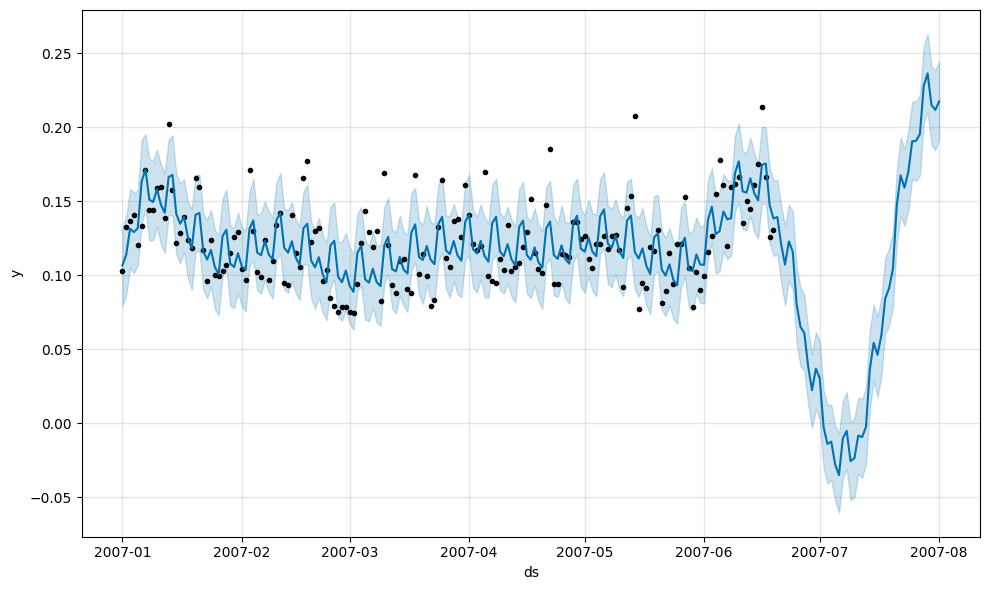

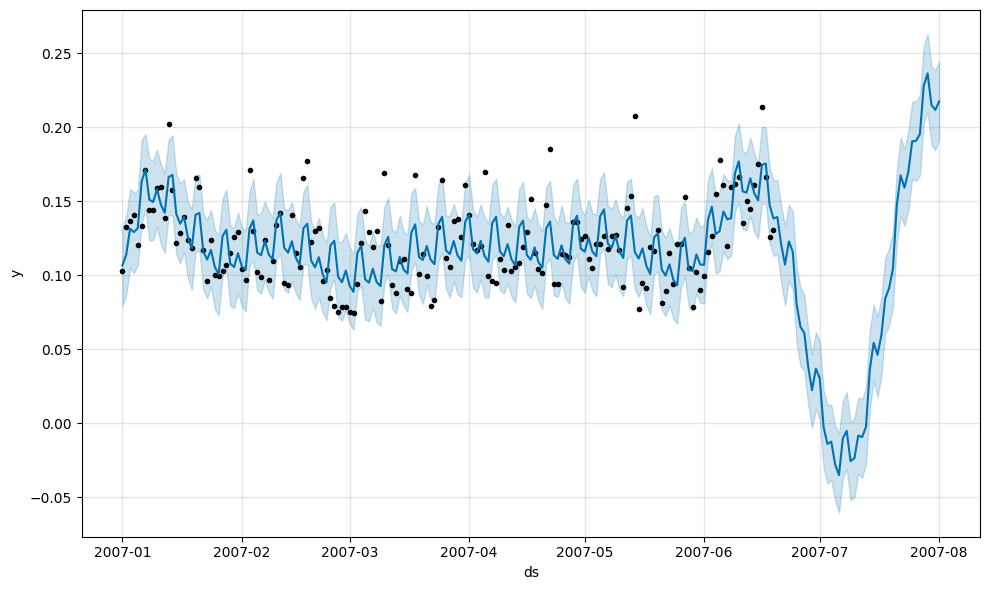

In [100]:
model_prophet.plot(forecast)

In [101]:
pred = forecast.iloc[-len(test):][['ds','yhat','yhat_lower','yhat_upper']]

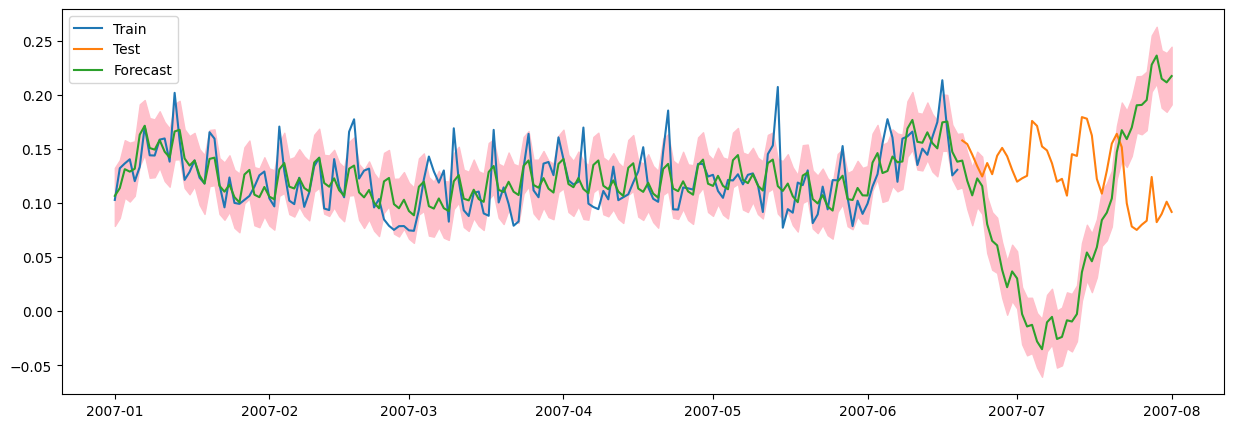

In [102]:
plt.figure(figsize=(15,5))
plt.plot(train['ds'],train['y'],label='Train')
plt.plot(test['ds'],test['y'],label='Test')
plt.plot(forecast['ds'],forecast['yhat'],label='Forecast')
plt.fill_between(forecast['ds'],forecast['yhat_lower'],forecast['yhat_upper'],color='pink')
plt.legend()
plt.show()

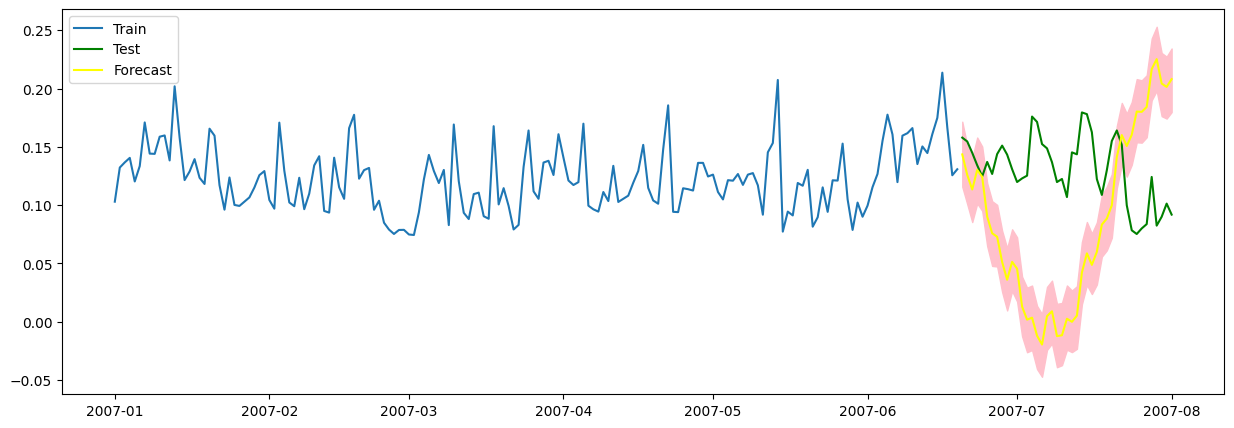

In [94]:
plt.figure(figsize=(15,5))
plt.plot(train['ds'],train['y'],label='Train')
plt.plot(test['ds'],test['y'],label='Test', color='green')
plt.plot(pred['ds'],pred['yhat'],label='Forecast',color='yellow')
plt.fill_between(pred['ds'],pred['yhat_lower'],pred['yhat_upper'],color='pink')
plt.legend()
plt.show()

In [95]:
mae = mean_absolute_error(test['y'],pred['yhat'])
rmse = np.sqrt(mean_squared_error(test['y'],pred['yhat']))
mape = np.mean(np.abs((test['y']-pred['yhat'])/test['y']))*100

In [96]:
print(mae)
print(rmse)
print(mape)

0.09040740051988476
0.1024533093380159
73.66855858705362


From observation We got Evaluation Matrices

For SARIMAX:-

    MAE = 0.03357139936864473

    RMSE = 0.03841522122677101

    MAPE = 33.84924382374353


For Prophet:-

    MAE = 0.09040740051988476

    RMSE = 0.1024533093380159

    MAPE = 73.66855858705362



